**Environment setup**

In [ ]:
!pip install -q "transformers==4.44.2" "tensorflow==2.18.0" "sacrebleu==2.4.0" "datasets==2.21.0" "evaluate==0.4.2" "gradio==4.44.0" "pandas==2.2.2" "scikit-learn==1.5.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/

**Dataset Creation**

The dataset was curated manually and also included as part of the notebook for full reproducibility.

In [ ]:
import pandas as pd

data = [
    # Crop Management
    ("What crops are best for sandy soils?", "Root crops like carrots, peanuts, and sweet potatoes perform well in sandy soils. Improve water retention by adding organic matter (compost) and applying mulches.", "crop_selection", "easy"),
    ("How often should I rotate crops?", "Rotate crop families every season (or at least annually). A 3–4 year rotation helps break pest/disease cycles and improves soil nutrient balance.", "crop_rotation", "easy"),
    ("Which crops fix nitrogen naturally?", "Legumes such as beans, peas, cowpea, and clover fix nitrogen through symbiosis with rhizobia. Inoculate seeds if soils lack native rhizobia.", "soil_nutrients", "easy"),
    ("How do I choose drought-tolerant crops?", "Select varieties with short maturity and deep roots: sorghum, millet, cassava, cowpea. Use mulching and staggered planting to spread risk.", "crop_selection", "medium"),
    ("What is intercropping and why use it?", "Intercropping is growing two or more crops together. It improves resource use, suppresses weeds, reduces pest pressure, and stabilizes yields.", "intercropping", "easy"),
    # Soil & Fertility
    ("How can I improve soil fertility organically?", "Apply 5–10 tons/ha of compost or well-decomposed manure, rotate with legumes, retain crop residues, and avoid burning. Test soil to target amendments.", "soil_fertility", "easy"),
    ("What is the ideal soil pH for most crops?", "Most crops prefer pH 6.0–7.0. Lime acidic soils and apply elemental sulfur for alkaline soils as recommended by soil tests.", "soil_testing", "easy"),
    ("How much lime should I apply?", "Base lime rates on a soil test. As a rough guide, 1–2 tons/ha of agricultural lime can raise pH in acidic soils, but lab recommendations are essential.", "soil_amendments", "medium"),
    ("What are signs of nitrogen deficiency?", "Yellowing leaves starting from older leaves, stunted growth, and low tillering in cereals indicate nitrogen deficiency. Confirm with soil or leaf tests.", "soil_nutrients", "easy"),
    ("Should I use urea or NPK?", "Use NPK for balanced basal fertilization at planting; top-dress with urea or CAN when crops are established. Follow local recommendations and soil tests.", "fertilizer_management", "medium"),
    # Irrigation & Water
    ("How often should I irrigate tomatoes?", "Irrigate 2–3 times per week depending on weather and soil; keep soil consistently moist but not waterlogged. Drip irrigation is ideal.", "irrigation", "easy"),
    ("What is drip irrigation and its benefits?", "Drip delivers water to the root zone at low rates, reducing evaporation, disease, and weed growth. It improves water-use efficiency and yields.", "irrigation", "easy"),
    ("How can I harvest rainwater for crops?", "Install gutters into storage tanks, use lined ponds, and channel runoff to infiltration pits or swales. Cover storage to prevent contamination and evaporation.", "water_harvesting", "medium"),
    ("What time of day is best to irrigate?", "Early morning or late afternoon reduces evaporation and leaf burn. Avoid night irrigation in humid climates to limit fungal disease.", "irrigation", "easy"),
    # Pests & Diseases
    ("How do I control aphids organically?", "Use strong water sprays, introduce natural enemies (lady beetles), apply neem oil or insecticidal soap, and remove infested tips.", "ipm", "easy"),
    ("What is Integrated Pest Management (IPM)?", "IPM combines prevention, monitoring, and targeted controls (cultural, biological, mechanical, chemical as last resort) to keep pests below economic thresholds.", "ipm", "easy"),
    ("How can I reduce maize fall armyworm damage?", "Scout weekly, interplant with legumes, apply Bt or neem early, encourage natural enemies, and use recommended selective insecticides if thresholds are exceeded.", "pest_control", "medium"),
    ("How do I prevent fungal diseases?", "Improve air flow with proper spacing, irrigate at soil level, rotate crops, remove infected residues, and use resistant varieties or fungicides if needed.", "disease_management", "easy"),
    # Weather & Climate
    ("How should I plan planting around rainfall?", "Use local seasonal forecasts and historical data. Plant early-maturing varieties at the onset of rains; stagger planting to hedge against variability.", "climate_planning", "medium"),
    ("What can I do against drought risk?", "Adopt drought-tolerant varieties, mulch, conserve soil moisture with minimum tillage, practice water harvesting, and diversify crops/livestock.", "risk_management", "medium"),
    ("How does mulching help?", "Mulch reduces evaporation, suppresses weeds, moderates soil temperature, and can add organic matter as it breaks down.", "soil_water", "easy"),
    # Postharvest & Marketing
    ("How can I reduce postharvest losses in grains?", "Dry to safe moisture (~12–13%), use airtight or hermetic storage, clean stores, and control rodents. Handle gently to avoid breaking grains.", "postharvest", "medium"),
    ("What are good storage options for maize?", "Use hermetic bags, metal silos, or sealed plastic drums; keep off the floor and away from walls; check for pests monthly.", "postharvest", "easy"),
    ("How do I decide when to harvest?", "Harvest at physiological maturity: check color changes, firmness, sugar content (for fruits), and dry matter. Avoid harvesting after rain.", "harvest", "easy"),
    # Sustainability & Soil Conservation
    ("What is conservation agriculture?", "It is minimal soil disturbance, permanent organic soil cover, and diverse crop rotations. It improves soil structure and long-term productivity.", "sustainability", "medium"),
    ("How can I reduce soil erosion on slopes?", "Build contour bunds or terraces, plant vetiver/napier grass strips, maintain cover crops, and avoid bare fallows.", "soil_conservation", "medium"),
    ("Is burning crop residues good practice?", "Avoid burning: it loses nutrients and organic matter and increases erosion. Incorporate residues or compost them instead.", "sustainability", "easy"),
    # Safety & Inputs
    ("How do I handle pesticides safely?", "Read labels, wear PPE (gloves, mask, long sleeves), avoid windy spraying, calibrate sprayers, and store chemicals locked away from children and food.", "safety", "easy"),
    ("How do I calibrate a knapsack sprayer?", "Measure nozzle output per minute, walk a known area at normal pace, and adjust pressure/nozzles to apply the recommended rate per hectare.", "application", "medium"),
    # Economics & Planning
    ("How do I estimate profit before planting?", "List costs (seed, fertilizer, labor, irrigation), estimate yield and price, compute gross margin = revenue − variable costs; run best/worst-case scenarios.", "farm_economics", "medium"),
    ("Should I buy hybrid or open-pollinated seed?", "Hybrids give higher yields but you must buy fresh seed yearly; open-pollinated varieties are cheaper and can be saved with some yield trade-off.", "seed_choice", "easy"),
    # Out-of-Domain Handling
    ("Can you fix my smartphone screen?", "I’m focused on agriculture questions like crops, soils, water, and pests. Please ask a farming-related question.", "ood_rejection", "easy"),
    ("What is the capital of France?", "I only answer agriculture topics. Try asking about crops, soils, irrigation, or pests.", "ood_rejection", "easy"),
]

df = pd.DataFrame(data, columns=["question", "answer", "intent", "difficulty"])
df.to_csv("agribot_dataset.csv", index=False)
print("Saved → agribot_dataset.csv")
df.head()

Saved → agribot_dataset.csv


,question,answer,intent,difficulty
0,What crops are best for sandy soils?,"Root crops like carrots, peanuts, and sweet po...",crop_selection,easy
1,How often should I rotate crops?,Rotate crop families every season (or at least...,crop_rotation,easy
2,Which crops fix nitrogen naturally?,"Legumes such as beans, peas, cowpea, and clove...",soil_nutrients,easy
3,How do I choose drought-tolerant crops?,Select varieties with short maturity and deep ...,crop_selection,medium
4,What is intercropping and why use it?,Intercropping is growing two or more crops tog...,intercropping,easy


**Preprocessing, Cleaning and Splitting**

In [ ]:
import pandas as pd, re

# Clean text: strip spaces, remove double spaces, etc.
def clean_text(text):
    text = str(text).strip()
    text = re.sub(r'\s+', ' ', text)
    return text

# cleaning
df["question"] = df["question"].apply(clean_text)
df["answer"]   = df["answer"].apply(clean_text)

# Drop missing or empty
df = df.dropna(subset=["question", "answer"])
df = df[df["question"].str.strip() != ""]
df = df[df["answer"].str.strip() != ""]

# Removing duplicates
before = len(df)
df = df.drop_duplicates(subset=["question", "answer"])
after = len(df)
print(f" Cleaned dataset: {after} rows (removed {before - after} duplicates)")
df.head(3)

 Cleaned dataset: 33 rows (removed 0 duplicates)


,question,answer,intent,difficulty
0,What crops are best for sandy soils?,"Root crops like carrots, peanuts, and sweet po...",crop_selection,easy
1,How often should I rotate crops?,Rotate crop families every season (or at least...,crop_rotation,easy
2,Which crops fix nitrogen naturally?,"Legumes such as beans, peas, cowpea, and clove...",soil_nutrients,easy


Inspect the current intent distribution

In [ ]:
import pandas as pd

assert "intent" in df.columns, "Expected an 'intent' column. If you don't have it, skip stratify."

cnt = df["intent"].value_counts().sort_values(ascending=True)
print("Intent counts (ascending):")
display(cnt)

Intent counts (ascending):


,count
intent,
intercropping,1
climate_planning,1
disease_management,1
soil_fertility,1
soil_testing,1
soil_amendments,1
fertilizer_management,1
crop_rotation,1
pest_control,1


Creating Coarse Buckets

In [ ]:
# Creating broader "buckets" for stratified splitting
BUCKETS = {
    # Crop management
    "crop_selection": "crop_mgmt",
    "crop_rotation": "crop_mgmt",
    "intercropping": "crop_mgmt",

    # Soil & fertility
    "soil_nutrients": "soil_fertility",
    "soil_fertility": "soil_fertility",
    "soil_testing": "soil_fertility",
    "soil_amendments": "soil_fertility",
    "fertilizer_management": "soil_fertility",

    # Water & irrigation
    "irrigation": "water_irrigation",
    "water_harvesting": "water_irrigation",
    "soil_water": "water_irrigation",

    # Pests & diseases
    "ipm": "pests_diseases",
    "pest_control": "pests_diseases",
    "disease_management": "pests_diseases",

    # Weather & climate
    "climate_planning": "weather_climate",
    "risk_management": "weather_climate",

    # Postharvest & harvest
    "postharvest": "postharvest",
    "harvest": "postharvest",

    # Sustainability / conservation
    "sustainability": "sustainability",
    "soil_conservation": "sustainability",

    # Safety & applications
    "safety": "safety_apps",
    "application": "safety_apps",

    # Economics & seed choice
    "farm_economics": "economics",
    "seed_choice": "economics",

    # Out-of-domain guardrails
    "ood_rejection": "ood_rejection",
}

# Apply the mapping
df["bucket"] = df["intent"].map(BUCKETS).fillna("misc")

print(" Created bucket column.")
display(df[["intent", "bucket"]].head(10))

# Count samples per bucket
print("\nBucket counts:")
display(df["bucket"].value_counts().sort_values(ascending=True))

 Created bucket column.


,intent,bucket
0,crop_selection,crop_mgmt
1,crop_rotation,crop_mgmt
2,soil_nutrients,soil_fertility
3,crop_selection,crop_mgmt
4,intercropping,crop_mgmt
5,soil_fertility,soil_fertility
6,soil_testing,soil_fertility
7,soil_amendments,soil_fertility
8,soil_nutrients,soil_fertility
9,fertilizer_management,soil_fertility



Bucket counts:


,count
bucket,
weather_climate,2
safety_apps,2
ood_rejection,2
economics,2
postharvest,3
sustainability,3
crop_mgmt,4
pests_diseases,4
water_irrigation,5


**Stratified Train/Validation Split and Checks**

In [ ]:
from math import ceil
from sklearn.model_selection import train_test_split

n_samples = len(df)
n_classes = df["bucket"].nunique()

# Minimum test size so that test_count >= n_classes
min_test = (n_classes + 0.0) / n_samples
# Add a small safety margin
test_size = max(0.2, min_test + 0.03)   # e.g., ~0.34 for 10 classes over 33 samples
test_size = min(test_size, 0.4)         # cap at 40% so we still have enough train data

print(f"n_samples={n_samples}, n_classes={n_classes}, chosen test_size={test_size:.2f}")

train_df, val_df = train_test_split(
    df, test_size=test_size, random_state=42, stratify=df["bucket"]
)

print(f"Training samples: {len(train_df)}   Validation samples: {len(val_df)}")
print("Buckets in val split:")
print(val_df['bucket'].value_counts().sort_index())

n_samples=33, n_classes=10, chosen test_size=0.33
Training samples: 22   Validation samples: 11
Buckets in val split:
bucket
crop_mgmt           1
economics           1
pests_diseases      1
postharvest         1
safety_apps         1
soil_fertility      2
sustainability      1
water_irrigation    2
weather_climate     1
Name: count, dtype: int64


,train,val
bucket,,
crop_mgmt,3,1
economics,1,1
ood_rejection,2,0
pests_diseases,3,1
postharvest,2,1
safety_apps,1,1
soil_fertility,4,2
sustainability,2,1
water_irrigation,3,2


<Figure size 800x400 with 0 Axes>

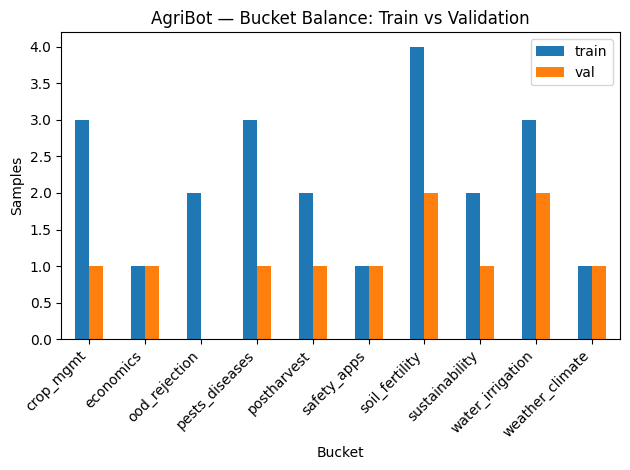

In [ ]:
# Required columns present
required_cols = {"question", "answer", "intent", "bucket"}
assert required_cols.issubset(train_df.columns)
assert required_cols.issubset(val_df.columns)

# No empties
assert (train_df["question"].str.len() > 0).all() and (train_df["answer"].str.len() > 0).all()
assert (val_df["question"].str.len() > 0).all()   and (val_df["answer"].str.len() > 0).all()

# Compare bucket balance
import pandas as pd
import matplotlib.pyplot as plt

balance = pd.DataFrame({
    "train": train_df["bucket"].value_counts().sort_index(),
    "val":   val_df["bucket"].value_counts().sort_index()
}).fillna(0).astype(int)

display(balance)

plt.figure(figsize=(8,4))
balance.plot(kind="bar")
plt.title("AgriBot — Bucket Balance: Train vs Validation")
plt.xlabel("Bucket")
plt.ylabel("Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
train_df.to_csv("agribot_train.csv", index=False)
val_df.to_csv("agribot_val.csv", index=False)
print(" Saved agribot_train.csv and agribot_val.csv")

 Saved agribot_train.csv and agribot_val.csv


In [ ]:
from google.colab import files
files.download("agribot_train.csv")
files.download("agribot_val.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Load T5 tokenizer & model (TensorFlow)**

In [ ]:
!pip install -q "transformers==4.44.2" "tensorflow==2.18.0"

from transformers import T5TokenizerFast, TFT5ForConditionalGeneration

MODEL_NAME = "t5-small"
tokenizer = T5TokenizerFast.from_pretrained(MODEL_NAME)
model = TFT5ForConditionalGeneration.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


**Preparing the inputs: adding a simple task prefix**

We’ll give the model a consistent prompt format:

In [ ]:
"question: <user question>  domain: agriculture"

'question: <user question>  domain: agriculture'

In [ ]:
MAX_IN  = 128   # max input tokens
MAX_OUT = 128   # max output tokens

def to_source(q: str) -> str:
    return f"question: {q} domain: agriculture"

In [ ]:
import tensorflow as tf, transformers, sys
print("Python:", sys.version.split()[0])
print("TensorFlow:", tf.__version__)
print("Transformers:", transformers.__version__)

Python: 3.12.11
TensorFlow: 2.19.0
Transformers: 4.56.2


In [ ]:
# ==== RECOVERY CELL: rebuild or reload dataset & splits, then save ====
import os, re, math
import pandas as pd
from sklearn.model_selection import train_test_split

def build_default_dataset():
    data = [
        # Crop Management
        ("What crops are best for sandy soils?", "Root crops like carrots, peanuts, and sweet potatoes perform well in sandy soils. Improve water retention by adding organic matter (compost) and applying mulches.", "crop_selection", "easy"),
        ("How often should I rotate crops?", "Rotate crop families every season (or at least annually). A 3–4 year rotation helps break pest/disease cycles and improves soil nutrient balance.", "crop_rotation", "easy"),
        ("Which crops fix nitrogen naturally?", "Legumes such as beans, peas, cowpea, and clover fix nitrogen through symbiosis with rhizobia. Inoculate seeds if soils lack native rhizobia.", "soil_nutrients", "easy"),
        ("How do I choose drought-tolerant crops?", "Select varieties with short maturity and deep roots: sorghum, millet, cassava, cowpea. Use mulching and staggered planting to spread risk.", "crop_selection", "medium"),
        ("What is intercropping and why use it?", "Intercropping is growing two or more crops together. It improves resource use, suppresses weeds, reduces pest pressure, and stabilizes yields.", "intercropping", "easy"),
        # Soil & Fertility
        ("How can I improve soil fertility organically?", "Apply 5–10 tons/ha of compost or well-decomposed manure, rotate with legumes, retain crop residues, and avoid burning. Test soil to target amendments.", "soil_fertility", "easy"),
        ("What is the ideal soil pH for most crops?", "Most crops prefer pH 6.0–7.0. Lime acidic soils and apply elemental sulfur for alkaline soils as recommended by soil tests.", "soil_testing", "easy"),
        ("How much lime should I apply?", "Base lime rates on a soil test. As a rough guide, 1–2 tons/ha of agricultural lime can raise pH in acidic soils, but lab recommendations are essential.", "soil_amendments", "medium"),
        ("What are signs of nitrogen deficiency?", "Yellowing leaves starting from older leaves, stunted growth, and low tillering in cereals indicate nitrogen deficiency. Confirm with soil or leaf tests.", "soil_nutrients", "easy"),
        ("Should I use urea or NPK?", "Use NPK for balanced basal fertilization at planting; top-dress with urea or CAN when crops are established. Follow local recommendations and soil tests.", "fertilizer_management", "medium"),
        # Irrigation & Water
        ("How often should I irrigate tomatoes?", "Irrigate 2–3 times per week depending on weather and soil; keep soil consistently moist but not waterlogged. Drip irrigation is ideal.", "irrigation", "easy"),
        ("What is drip irrigation and its benefits?", "Drip delivers water to the root zone at low rates, reducing evaporation, disease, and weed growth. It improves water-use efficiency and yields.", "irrigation", "easy"),
        ("How can I harvest rainwater for crops?", "Install gutters into storage tanks, use lined ponds, and channel runoff to infiltration pits or swales. Cover storage to prevent contamination and evaporation.", "water_harvesting", "medium"),
        ("What time of day is best to irrigate?", "Early morning or late afternoon reduces evaporation and leaf burn. Avoid night irrigation in humid climates to limit fungal disease.", "irrigation", "easy"),
        # Pests & Diseases
        ("How do I control aphids organically?", "Use strong water sprays, introduce natural enemies (lady beetles), apply neem oil or insecticidal soap, and remove infested tips.", "ipm", "easy"),
        ("What is Integrated Pest Management (IPM)?", "IPM combines prevention, monitoring, and targeted controls (cultural, biological, mechanical, chemical as last resort) to keep pests below economic thresholds.", "ipm", "easy"),
        ("How can I reduce maize fall armyworm damage?", "Scout weekly, interplant with legumes, apply Bt or neem early, encourage natural enemies, and use recommended selective insecticides if thresholds are exceeded.", "pest_control", "medium"),
        ("How do I prevent fungal diseases?", "Improve air flow with proper spacing, irrigate at soil level, rotate crops, remove infected residues, and use resistant varieties or fungicides if needed.", "disease_management", "easy"),
        # Weather & Climate
        ("How should I plan planting around rainfall?", "Use local seasonal forecasts and historical data. Plant early-maturing varieties at the onset of rains; stagger planting to hedge against variability.", "climate_planning", "medium"),
        ("What can I do against drought risk?", "Adopt drought-tolerant varieties, mulch, conserve soil moisture with minimum tillage, practice water harvesting, and diversify crops/livestock.", "risk_management", "medium"),
        ("How does mulching help?", "Mulch reduces evaporation, suppresses weeds, moderates soil temperature, and can add organic matter as it breaks down.", "soil_water", "easy"),
        # Postharvest & Marketing
        ("How can I reduce postharvest losses in grains?", "Dry to safe moisture (~12–13%), use airtight or hermetic storage, clean stores, and control rodents. Handle gently to avoid breaking grains.", "postharvest", "medium"),
        ("What are good storage options for maize?", "Use hermetic bags, metal silos, or sealed plastic drums; keep off the floor and away from walls; check for pests monthly.", "postharvest", "easy"),
        ("How do I decide when to harvest?", "Harvest at physiological maturity: check color changes, firmness, sugar content (for fruits), and dry matter. Avoid harvesting after rain.", "harvest", "easy"),
        # Sustainability & Soil Conservation
        ("What is conservation agriculture?", "It is minimal soil disturbance, permanent organic soil cover, and diverse crop rotations. It improves soil structure and long-term productivity.", "sustainability", "medium"),
        ("How can I reduce soil erosion on slopes?", "Build contour bunds or terraces, plant vetiver/napier grass strips, maintain cover crops, and avoid bare fallows.", "soil_conservation", "medium"),
        ("Is burning crop residues good practice?", "Avoid burning: it loses nutrients and organic matter and increases erosion. Incorporate residues or compost them instead.", "sustainability", "easy"),
        # Safety & Inputs
        ("How do I handle pesticides safely?", "Read labels, wear PPE (gloves, mask, long sleeves), avoid windy spraying, calibrate sprayers, and store chemicals locked away from children and food.", "safety", "easy"),
        ("How do I calibrate a knapsack sprayer?", "Measure nozzle output per minute, walk a known area at normal pace, and adjust pressure/nozzles to apply the recommended rate per hectare.", "application", "medium"),
        # Economics & Planning
        ("How do I estimate profit before planting?", "List costs (seed, fertilizer, labor, irrigation), estimate yield and price, compute gross margin = revenue − variable costs; run best/worst-case scenarios.", "farm_economics", "medium"),
        ("Should I buy hybrid or open-pollinated seed?", "Hybrids give higher yields but you must buy fresh seed yearly; open-pollinated varieties are cheaper and can be saved with some yield trade-off.", "seed_choice", "easy"),
        # Out-of-Domain Handling
        ("Can you fix my smartphone screen?", "I’m focused on agriculture questions like crops, soils, water, and pests. Please ask a farming-related question.", "ood_rejection", "easy"),
        ("What is the capital of France?", "I only answer agriculture topics. Try asking about crops, soils, irrigation, or pests.", "ood_rejection", "easy"),
    ]
    return pd.DataFrame(data, columns=["question","answer","intent","difficulty"])

def clean_text(t):
    t = str(t).strip()
    t = re.sub(r"\s+", " ", t)
    return t

# 1) Try to load saved splits
if os.path.exists("agribot_train.csv") and os.path.exists("agribot_val.csv"):
    train_df = pd.read_csv("agribot_train.csv")
    val_df   = pd.read_csv("agribot_val.csv")
    print("Loaded existing splits: agribot_train.csv / agribot_val.csv")

else:
    # 2) Else try a full dataset file
    if os.path.exists("agribot_dataset.csv"):
        df = pd.read_csv("agribot_dataset.csv")
        print("Loaded agribot_dataset.csv")
    else:
        # 3) Else recreate default dataset
        df = build_default_dataset()
        df.to_csv("agribot_dataset.csv", index=False)
        print("Recreated default dataset and saved to agribot_dataset.csv")

    # Clean
    df["question"] = df["question"].map(clean_text)
    df["answer"]   = df["answer"].map(clean_text)
    df = df.dropna(subset=["question","answer"])
    df = df[(df["question"].str.len() > 0) & (df["answer"].str.len() > 0)]
    df = df.drop_duplicates(subset=["question","answer"])

    # Buckets for stratify
    BUCKETS = {
        "crop_selection":"crop_mgmt","crop_rotation":"crop_mgmt","intercropping":"crop_mgmt",
        "soil_nutrients":"soil_fertility","soil_fertility":"soil_fertility","soil_testing":"soil_fertility",
        "soil_amendments":"soil_fertility","fertilizer_management":"soil_fertility",
        "irrigation":"water_irrigation","water_harvesting":"water_irrigation","soil_water":"water_irrigation",
        "ipm":"pests_diseases","pest_control":"pests_diseases","disease_management":"pests_diseases",
        "climate_planning":"weather_climate","risk_management":"weather_climate",
        "postharvest":"postharvest","harvest":"postharvest",
        "sustainability":"sustainability","soil_conservation":"sustainability",
        "safety":"safety_apps","application":"safety_apps",
        "farm_economics":"economics","seed_choice":"economics",
        "ood_rejection":"ood_rejection",
    }
    df["bucket"] = df["intent"].map(BUCKETS).fillna("misc")

    # Merge any tiny buckets (<2) into 'misc'
    tiny = df["bucket"].value_counts()
    tiny = tiny[tiny < 2].index.tolist()
    if tiny:
        df.loc[df["bucket"].isin(tiny), "bucket"] = "misc"

    # Compute a valid test_size so each class appears in val at least once
    n_samples = len(df)
    n_classes = df["bucket"].nunique()
    min_test = n_classes / n_samples
    test_size = max(0.2, min_test + 0.03)
    test_size = min(test_size, 0.4)

    train_df, val_df = train_test_split(
        df, test_size=test_size, random_state=42, stratify=df["bucket"]
    )

    train_df.to_csv("agribot_train.csv", index=False)
    val_df.to_csv("agribot_val.csv", index=False)
    print(f"Saved splits → agribot_train.csv ({len(train_df)}) | agribot_val.csv ({len(val_df)})")

print("Train/Val shapes:", train_df.shape, val_df.shape)

Recreated default dataset and saved to agribot_dataset.csv
Saved splits → agribot_train.csv (22) | agribot_val.csv (11)
Train/Val shapes: (22, 5) (11, 5)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil, os
os.makedirs("/content/drive/MyDrive/AgriBot", exist_ok=True)
for fname in ["agribot_dataset.csv","agribot_train.csv","agribot_val.csv"]:
    if os.path.exists(fname):
        shutil.copy(fname, f"/content/drive/MyDrive/AgriBot/{fname}")
print("Copied files to /MyDrive/AgriBot/")

Mounted at /content/drive
Copied files to /MyDrive/AgriBot/


**Reload your saved splits**

In [ ]:
import pandas as pd, os

if os.path.exists("agribot_train.csv") and os.path.exists("agribot_val.csv"):
    train_df = pd.read_csv("agribot_train.csv")
    val_df   = pd.read_csv("agribot_val.csv")
else:
    raise FileNotFoundError("Missing agribot_train.csv / agribot_val.csv. Re-run the split-save step.")

print(train_df.shape, val_df.shape)
train_df.head(2)

(22, 5) (11, 5)


,question,answer,intent,difficulty,bucket
0,How does mulching help?,"Mulch reduces evaporation, suppresses weeds, m...",soil_water,easy,water_irrigation
1,How do I choose drought-tolerant crops?,Select varieties with short maturity and deep ...,crop_selection,medium,crop_mgmt


**Recreating tokenizer and model**

In [ ]:
!pip install -q "transformers==4.44.2" "tensorflow==2.18.0" "safetensors==0.4.4"

from transformers import (
    T5TokenizerFast, TFT5ForConditionalGeneration,
    AutoTokenizer, TFAutoModelForSeq2SeqLM
)

def load_t5_tf_with_fallback():
    # 1) Try native TF weights (t5-small)
    MODEL_1 = "t5-small"
    try:
        tok = T5TokenizerFast.from_pretrained(MODEL_1, use_fast=True)
        mdl = TFT5ForConditionalGeneration.from_pretrained(MODEL_1)
        print(" Loaded TF weights for:", MODEL_1)
        return tok, mdl, MODEL_1
    except Exception as e1:
        print(" Native TF load failed for t5-small:", type(e1).__name__, "-", e1)

    # 2) Try converting from PyTorch weights (t5-small)
    try:
        tok = T5TokenizerFast.from_pretrained(MODEL_1, use_fast=True)
        mdl = TFT5ForConditionalGeneration.from_pretrained(MODEL_1, from_pt=True)
        print(" Loaded from PT weights for:", MODEL_1)
        return tok, mdl, MODEL_1
    except Exception as e2:
        print(" from_pt load failed for t5-small:", type(e2).__name__, "-", e2)

    # 3) Fallback to FLAN-T5-small (TF auto model)
    MODEL_2 = "google/flan-t5-small"
    try:
        tok = AutoTokenizer.from_pretrained(MODEL_2, use_fast=True)
        mdl = TFAutoModelForSeq2SeqLM.from_pretrained(MODEL_2, from_pt=True)
        print(" Fallback loaded:", MODEL_2)
        return tok, mdl, MODEL_2
    except Exception as e3:
        raise RuntimeError(f"All loading attempts failed: {type(e3).__name__} - {e3}")

tokenizer, model, MODEL_NAME = load_t5_tf_with_fallback()
print("Using model:", MODEL_NAME)

 Native TF load failed for t5-small: TypeError - 'builtins.safe_open' object is not iterable


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


 Loaded from PT weights for: t5-small
Using model: t5-small


**Rebuild datasets (cast to int32)**

In [ ]:
import numpy as np, tensorflow as tf

MAX_IN, MAX_OUT = 128, 128

def to_source(q: str) -> str:
    return f"question: {q} domain: agriculture"

def encode_pair_batch(questions, answers):
    enc = tokenizer(
        [to_source(q) for q in questions],
        max_length=MAX_IN, truncation=True, padding="max_length",
        return_tensors="np"
    )
    lbl = tokenizer(
        list(answers),
        max_length=MAX_OUT, truncation=True, padding="max_length",
        return_tensors="np"
    )["input_ids"]
    pad_id = tokenizer.pad_token_id
    lbl = np.where(lbl == pad_id, -100, lbl)
    # Cast to int32 for TF
    enc = {
        "input_ids":      enc["input_ids"].astype("int32"),
        "attention_mask": enc["attention_mask"].astype("int32"),
    }
    lbl = lbl.astype("int32")
    return enc, lbl

train_enc, train_lbl = encode_pair_batch(train_df["question"], train_df["answer"])
val_enc,   val_lbl   = encode_pair_batch(val_df["question"],   val_df["answer"])

BATCH_SIZE = 8  # if memory is tight, set to 4

train_ds = tf.data.Dataset.from_tensor_slices((
    {"input_ids": train_enc["input_ids"], "attention_mask": train_enc["attention_mask"]},
    train_lbl
)).shuffle(len(train_df), seed=42).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((
    {"input_ids": val_enc["input_ids"], "attention_mask": val_enc["attention_mask"]},
    val_lbl
)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print("train shapes:", train_enc["input_ids"].shape, train_lbl.shape)
print("val shapes:",   val_enc["input_ids"].shape,   val_lbl.shape)

train shapes: (22, 128) (22, 128)
val shapes: (11, 128) (11, 128)


**Manual baseline (no compile())**

In [ ]:
import math, tensorflow as tf

def eval_loss(ds):
    losses = []
    for (x, y) in ds:
        # Forward pass with labels; HF returns .loss
        out = model(input_ids=x["input_ids"], attention_mask=x["attention_mask"], labels=y, training=False)
        losses.append(float(out.loss.numpy()))
    return sum(losses) / max(1, len(losses))

base_loss = eval_loss(val_ds)
base_ppl  = math.exp(base_loss)
print(f"Manual baseline — val_loss: {base_loss:.4f} | perplexity: {base_ppl:.2f}")

/tmp/ipython-input-2849163196.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(out.loss.numpy()))


Manual baseline — val_loss: 5.7770 | perplexity: 322.80


**Manual training loop (Early Stopping + checkpoint)**

In [ ]:
# Optimizer from tf_keras (Keras 3) — safe for manual tape training
from tf_keras.optimizers import Adam
opt = Adam(learning_rate=3e-4, global_clipnorm=1.0)

EPOCHS = 12
PATIENCE = 2
best_val = float("inf")
wait = 0

train_hist, val_hist = [], []

ckpt_path = "t5_agribot_best.weights.h5"  # lightweight weights file

for epoch in range(1, EPOCHS+1):
    # ---- Train ----
    train_losses = []
    for (x, y) in train_ds:
        with tf.GradientTape() as tape:
            out = model(input_ids=x["input_ids"], attention_mask=x["attention_mask"], labels=y, training=True)
            loss = out.loss  # scalar
        grads = tape.gradient(loss, model.trainable_variables)
        opt.apply_gradients(list(zip(grads, model.trainable_variables)))
        train_losses.append(float(loss.numpy()))
    train_loss = sum(train_losses)/max(1,len(train_losses))

    # ---- Validate ----
    val_loss = eval_loss(val_ds)

    train_hist.append(train_loss); val_hist.append(val_loss)
    print(f"Epoch {epoch:02d} | train_loss={train_loss:.4f} | val_loss={val_loss:.4f}")

    # ---- Early Stopping ----
    if val_loss + 1e-6 < best_val:
        best_val = val_loss
        wait = 0
        model.save_weights(ckpt_path)
        print(f"  ✓ improved. Saved weights → {ckpt_path}")
    else:
        wait += 1
        print(f"  no improvement ({wait}/{PATIENCE})")
        if wait >= PATIENCE:
            print("  Early stopping.")
            break

# Load best weights back
model.load_weights(ckpt_path)
print("Loaded best weights for evaluation.")

/tmp/ipython-input-3423117538.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_losses.append(float(loss.numpy()))
/tmp/ipython-input-2849163196.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(out.loss.numpy()))


Epoch 01 | train_loss=5.2462 | val_loss=4.6922


/usr/local/lib/python3.12/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 02 | train_loss=4.4746 | val_loss=4.4672
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 03 | train_loss=4.2174 | val_loss=4.3778
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 04 | train_loss=4.0061 | val_loss=4.3374
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 05 | train_loss=3.8234 | val_loss=4.3128
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 06 | train_loss=3.6808 | val_loss=4.2921
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 07 | train_loss=3.5137 | val_loss=4.2811
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 08 | train_loss=3.3291 | val_loss=4.2693
  ✓ improved. Saved weights → t5_agribot_best.weights.h5
Epoch 09 | train_loss=3.1755 | val_loss=4.2717
  no improvement (1/2)
Epoch 10 | train_loss=2.9964 | val_loss=4.2802
  no improvement (2/2)
  Early stopping.
Loaded best weights for evaluation.


**Evaluate + BLEU + training curve (+ download)**

In [ ]:
# Final val metrics
final_loss = eval_loss(val_ds)
final_ppl  = math.exp(final_loss)
print(f"After fine-tuning — val_loss: {final_loss:.4f} | perplexity: {final_ppl:.2f}")

/tmp/ipython-input-2849163196.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(out.loss.numpy()))


After fine-tuning — val_loss: 4.2693 | perplexity: 71.47


In [ ]:
# Install if missing (safe to run multiple times)
import sys, subprocess, pkgutil
if not pkgutil.find_loader("sacrebleu"):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "sacrebleu==2.4.0"])

import sacrebleu

def generate_text(q):
    inp = tokenizer(to_source(q), return_tensors="tf", truncation=True, max_length=128)
    out_ids = model.generate(**inp, max_new_tokens=120, temperature=0.7, top_p=0.95)
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# Build refs & hyps for the validation split
hyps, refs = [], []
for _, row in val_df.iterrows():
    hyps.append(generate_text(row["question"]))
    refs.append(row["answer"])

bleu = sacrebleu.corpus_bleu(hyps, [refs])  # sacrebleu expects list-of-systems vs list-of-references
print(f"BLEU: {bleu.score:.2f}")

/tmp/ipython-input-210846247.py:3: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if not pkgutil.find_loader("sacrebleu"):
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


BLEU: 0.57


**Save a CSV of questions, references, and hypotheses (download-ready)**

In [ ]:
import pandas as pd

eval_rows = []
for i, (_, row) in enumerate(val_df.iterrows()):
    eval_rows.append({
        "question": row["question"],
        "reference_answer": row["answer"],
        "model_answer": hyps[i],
        "bucket": row.get("bucket", None)
    })

eval_df = pd.DataFrame(eval_rows)
eval_df.to_csv("agribot_eval_val_predictions.csv", index=False)
print("Saved: agribot_eval_val_predictions.csv")

# (Colab only) uncomment to download:
# from google.colab import files
# files.download("agribot_eval_val_predictions.csv")

Saved: agribot_eval_val_predictions.csv


**BLEU by bucket chart**

Saved: bleu_by_bucket.png


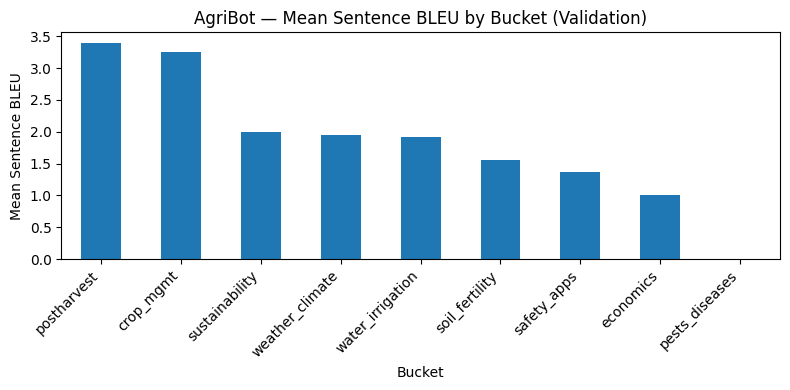

In [ ]:
# Sentence-level BLEU then average per bucket (sacrebleu supports sentence_bleu)
import numpy as np
import matplotlib.pyplot as plt

sent_bleus = []
for ref, hyp in zip(refs, hyps):
    sb = sacrebleu.sentence_bleu(hyp, [ref]).score
    sent_bleus.append(sb)

eval_df["sentence_bleu"] = sent_bleus

if "bucket" in eval_df.columns and eval_df["bucket"].notna().any():
    bucket_bleu = eval_df.groupby("bucket")["sentence_bleu"].mean().sort_values(ascending=False)
    ax = bucket_bleu.plot(kind="bar", figsize=(8,4))
    ax.set_title("AgriBot — Mean Sentence BLEU by Bucket (Validation)")
    ax.set_xlabel("Bucket"); ax.set_ylabel("Mean Sentence BLEU")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout()
    plt.savefig("bleu_by_bucket.png", dpi=200)
    print("Saved: bleu_by_bucket.png")

    # Colab download (optional)
    # from google.colab import files
    # files.download("bleu_by_bucket.png")
else:
    print("No 'bucket' column found; skipping BLEU-by-bucket chart.")

**Token-level F1**

In [ ]:
import re
def normalize(s):
    return re.sub(r"\s+", " ", s.strip().lower())

def f1_token_level(pred, gold):
    p = normalize(pred).split()
    g = normalize(gold).split()
    common = set(p) & set(g)
    if len(p) == 0 or len(g) == 0:
        return 0.0
    prec = len(common) / len(p)
    rec  = len(common) / len(g)
    if prec + rec == 0:
        return 0.0
    return 2 * prec * rec / (prec + rec)

eval_df["f1_token"] = [f1_token_level(h, r) for h, r in zip(hyps, refs)]
print("Mean token-level F1 on validation:", float(eval_df["f1_token"].mean()))
eval_df.to_csv("agribot_eval_val_predictions.csv", index=False)  # overwrite with F1 column

Mean token-level F1 on validation: 0.12210573298798294


**deterministic BLEU + F1 (no randomness)**

In [ ]:
# Ensure sacrebleu is installed
import sys, subprocess, pkgutil
if not pkgutil.find_loader("sacrebleu"):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "sacrebleu==2.4.0"])
import sacrebleu, math, pandas as pd

def generate_text_beam(q, beams=4, max_new=120):
    inp = tokenizer(to_source(q), return_tensors="tf", truncation=True, max_length=128)
    out_ids = model.generate(**inp, num_beams=beams, do_sample=False, max_new_tokens=max_new)
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# Recompute metrics deterministically
hyps_det, refs = [], []
for _, row in val_df.iterrows():
    hyps_det.append(generate_text_beam(row["question"]))
    refs.append(row["answer"])

bleu_det = sacrebleu.corpus_bleu(hyps_det, [refs]).score
print(f"Deterministic BLEU (beams=4): {bleu_det:.2f}")

import re
def normalize(s): return re.sub(r"\s+", " ", s.strip().lower())
def f1_token(pred, gold):
    p, g = normalize(pred).split(), normalize(gold).split()
    if not p or not g: return 0.0
    inter = set(p) & set(g)
    if not inter: return 0.0
    prec, rec = len(inter)/len(p), len(inter)/len(g)
    return 0.0 if (prec+rec)==0 else 2*prec*rec/(prec+rec)

mean_f1_det = sum(f1_token(h, r) for h, r in zip(hyps_det, refs)) / len(refs)
print(f"Deterministic token F1: {mean_f1_det:.3f}")

/tmp/ipython-input-2037080596.py:3: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if not pkgutil.find_loader("sacrebleu"):


Deterministic BLEU (beams=4): 0.67
Deterministic token F1: 0.103


**running an experiment end-to-end (manual loop)**

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM
from tf_keras.optimizers import Adam

def run_experiment(
    exp_name="expA_t5small_lr3e4",
    model_name="t5-small",
    lr=3e-4,
    epochs=12,
    patience=2,
    beams=4,
    batch_size=8,
    max_in=128,
    max_out=128
):
    print(f"\n===== {exp_name} :: {model_name} | lr={lr} | epochs={epochs} | bs={batch_size} =====")
    # Load tokenizer+model (auto TF, from_pt for safety)
    tok = AutoTokenizer.from_pretrained(model_name, use_fast=True)
    mdl = TFAutoModelForSeq2SeqLM.from_pretrained(model_name, from_pt=True)

    # Build fresh datasets for this tokenizer (pad ids can differ slightly)
    def to_src(q): return f"question: {q} domain: agriculture"
    def encode_df(qs, ans):
        enc = tok([to_src(q) for q in qs], max_length=max_in, truncation=True, padding="max_length", return_tensors="np")
        lbl = tok(list(ans), max_length=max_out, truncation=True, padding="max_length", return_tensors="np")["input_ids"]
        pad_id = tok.pad_token_id
        import numpy as np
        lbl = np.where(lbl == pad_id, -100, lbl).astype("int32")
        enc = { "input_ids": enc["input_ids"].astype("int32"),
                "attention_mask": enc["attention_mask"].astype("int32") }
        return enc, lbl

    tr_enc, tr_lbl = encode_df(train_df["question"], train_df["answer"])
    va_enc, va_lbl = encode_df(val_df["question"],   val_df["answer"])

    tr_ds = tf.data.Dataset.from_tensor_slices(({"input_ids": tr_enc["input_ids"], "attention_mask": tr_enc["attention_mask"]}, tr_lbl)).shuffle(len(train_df), seed=42).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    va_ds = tf.data.Dataset.from_tensor_slices(({"input_ids": va_enc["input_ids"], "attention_mask": va_enc["attention_mask"]}, va_lbl)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    # Eval function (no compile)
    import math
    def eval_loss(ds):
        losses=[]
        for x,y in ds:
            out = mdl(input_ids=x["input_ids"], attention_mask=x["attention_mask"], labels=y, training=False)
            losses.append(float(out.loss.numpy()))
        return sum(losses)/max(1,len(losses)), lambda v: math.exp(v)

    base_loss, exp_fn = eval_loss(va_ds)
    base_ppl = exp_fn(base_loss)
    print(f"Baseline → val_loss={base_loss:.4f} | ppl={base_ppl:.2f}")

    # Manual training loop
    opt = Adam(learning_rate=lr, global_clipnorm=1.0)
    best = float("inf"); wait = 0
    train_hist, val_hist = [], []
    ckpt = f"{exp_name}.weights.h5"

    for ep in range(1, epochs+1):
        # train
        train_losses=[]
        for x,y in tr_ds:
            with tf.GradientTape() as tape:
                out = mdl(input_ids=x["input_ids"], attention_mask=x["attention_mask"], labels=y, training=True)
                loss = out.loss
            grads = tape.gradient(loss, mdl.trainable_variables)
            opt.apply_gradients(zip(grads, mdl.trainable_variables))
            train_losses.append(float(loss.numpy()))
        tr_loss = sum(train_losses)/max(1,len(train_losses))

        # val
        va_loss, _ = eval_loss(va_ds)
        train_hist.append(tr_loss); val_hist.append(va_loss)
        print(f"Epoch {ep:02d} | train={tr_loss:.4f} | val={va_loss:.4f}")

        if va_loss + 1e-6 < best:
            best = va_loss; wait = 0
            mdl.save_weights(ckpt)
            print(f"  ✓ improved → saved {ckpt}")
        else:
            wait += 1
            print(f"  no improve ({wait}/{patience})")
            if wait >= patience:
                print("  Early stopping.")
                break

    # Load best & final eval
    mdl.load_weights(ckpt)
    final_loss, _ = eval_loss(va_ds)
    final_ppl = exp_fn(final_loss)

    # Deterministic BLEU + F1
    import sacrebleu, re
    def norm(s): return re.sub(r"\s+", " ", s.strip().lower())
    def f1_token(pred, gold):
        p, g = norm(pred).split(), norm(gold).split()
        if not p or not g: return 0.0
        inter = set(p) & set(g)
        if not inter: return 0.0
        prec, rec = len(inter)/len(p), len(inter)/len(g)
        return 0.0 if (prec+rec)==0 else 2*prec*rec/(prec+rec)

    def gen_beam(q):
        ids = tok(to_src(q), return_tensors="tf", truncation=True, max_length=max_in)
        out = mdl.generate(**ids, num_beams=beams, do_sample=False, max_new_tokens=120)
        return tok.decode(out[0], skip_special_tokens=True)

    hyps, refs = [], []
    for _, row in val_df.iterrows():
        hyp = gen_beam(row["question"])
        hyps.append(hyp)
        refs.append(row["answer"])

    bleu = sacrebleu.corpus_bleu(hyps, [refs]).score
    f1   = sum(f1_token(h,r) for h,r in zip(hyps, refs))/len(refs)

    # Save per-exp artifacts
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,4))
    plt.plot(train_hist, label="train"); plt.plot(val_hist, label="val")
    plt.title(f"{exp_name} — Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.tight_layout()
    curve_png = f"{exp_name}_curve.png"
    plt.savefig(curve_png, dpi=200)

    # Return a summary row
    return {
        "exp": exp_name,
        "model": model_name,
        "lr": lr,
        "epochs": epochs,
        "batch": batch_size,
        "baseline_ppl": round(base_ppl, 3),
        "final_ppl":    round(final_ppl, 3),
        "bleu":         round(bleu, 2),
        "f1_token":     round(f1, 3),
        "curve_image":  curve_png,
        "ckpt":         ckpt
    }

**Running two experiments**


===== expB_t5small_lr1e4 :: t5-small | lr=0.0001 | epochs=15 | bs=8 =====


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
/tmp/ipython-input-3884628078.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(out.loss.numpy()))


Baseline → val_loss=5.7770 | ppl=322.80


/tmp/ipython-input-3884628078.py:67: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_losses.append(float(loss.numpy()))


Epoch 01 | train=5.5904 | val=5.1060


/usr/local/lib/python3.12/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 02 | train=5.1833 | val=4.8628
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 03 | train=4.7748 | val=4.7021
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 04 | train=4.5796 | val=4.5899
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 05 | train=4.4569 | val=4.5106
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 06 | train=4.3283 | val=4.4539
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 07 | train=4.2581 | val=4.4121
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 08 | train=4.1824 | val=4.3826
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 09 | train=4.0292 | val=4.3614
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 10 | train=3.9318 | val=4.3416
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 11 | train=3.8961 | val=4.3239
  ✓ improved → saved expB_t5small_lr1e4.weights.h5
Epoch 12 | train=3.7836 | val=4.3095
  ✓ improved → saved expB_t5smal

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFT5ForConditionalGeneration: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight']
- This IS expected if you are initializing TFT5ForConditionalGeneration from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFT5ForConditionalGeneration from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassificati

Baseline → val_loss=4.2193 | ppl=67.99
Epoch 01 | train=4.4092 | val=4.0728
  ✓ improved → saved expC_flan_t5small_lr2e4.weights.h5
Epoch 02 | train=3.9818 | val=4.0113
  ✓ improved → saved expC_flan_t5small_lr2e4.weights.h5
Epoch 03 | train=3.8230 | val=3.9525
  ✓ improved → saved expC_flan_t5small_lr2e4.weights.h5
Epoch 04 | train=3.6143 | val=3.9172
  ✓ improved → saved expC_flan_t5small_lr2e4.weights.h5
Epoch 05 | train=3.3839 | val=3.8957
  ✓ improved → saved expC_flan_t5small_lr2e4.weights.h5
Epoch 06 | train=3.2294 | val=3.8888
  ✓ improved → saved expC_flan_t5small_lr2e4.weights.h5
Epoch 07 | train=3.0356 | val=3.8889
  no improve (1/3)
Epoch 08 | train=2.9128 | val=3.8952
  no improve (2/3)
Epoch 09 | train=2.7937 | val=3.9016
  no improve (3/3)
  Early stopping.


,exp,model,lr,epochs,batch,baseline_ppl,final_ppl,bleu,f1_token,curve_image,ckpt
0,expB_t5small_lr1e4,t5-small,0.0001,15,8,322.804,72.481,0.40,0.074,expB_t5small_lr1e4_curve.png,expB_t5small_lr1e4.weights.h5
1,expC_flan_t5small_lr2e4,google/flan-t5-small,0.0002,12,8,67.985,48.855,0.68,0.077,expC_flan_t5small_lr2e4_curve.png,expC_flan_t5small_lr2e4.weights.h5


Saved: agribot_experiments.csv


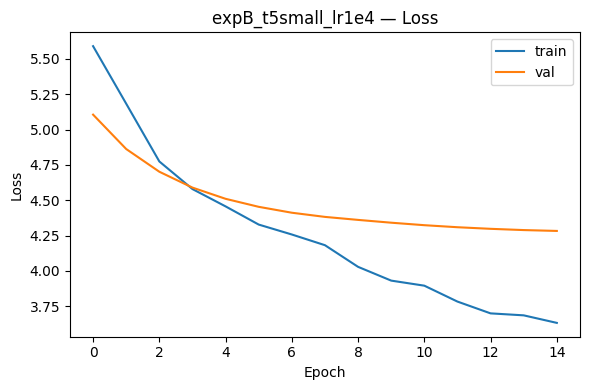

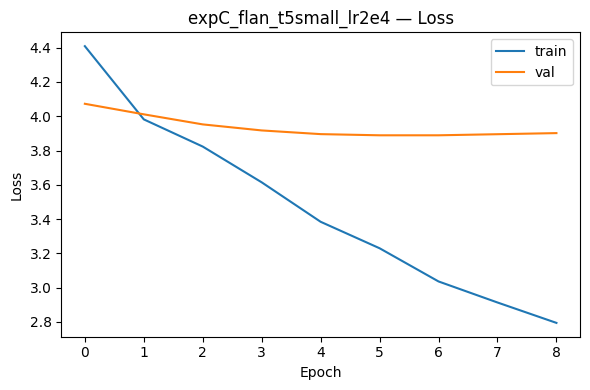

In [ ]:
results = []

# B) Lower LR (often more stable on tiny datasets)
results.append(run_experiment(
    exp_name="expB_t5small_lr1e4",
    model_name="t5-small",
    lr=1e-4,
    epochs=15,
    patience=3,
    beams=4,
    batch_size=8
))

# C) Instruction-tuned model (often better: FLAN-T5)
results.append(run_experiment(
    exp_name="expC_flan_t5small_lr2e4",
    model_name="google/flan-t5-small",
    lr=2e-4,
    epochs=12,
    patience=3,
    beams=4,
    batch_size=8
))

import pandas as pd
res_df = pd.DataFrame(results)
display(res_df)
res_df.to_csv("agribot_experiments.csv", index=False)
print("Saved: agribot_experiments.csv")